## Predicting the Median Housing Price in Any District

In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plta
%matplotlib inline

# read data
data = pd.read_csv("housing.csv")

### Looking at the data and data preparation

In [2]:
# quick look on the data 
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [4]:
# non-numerical data
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# counting null data
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

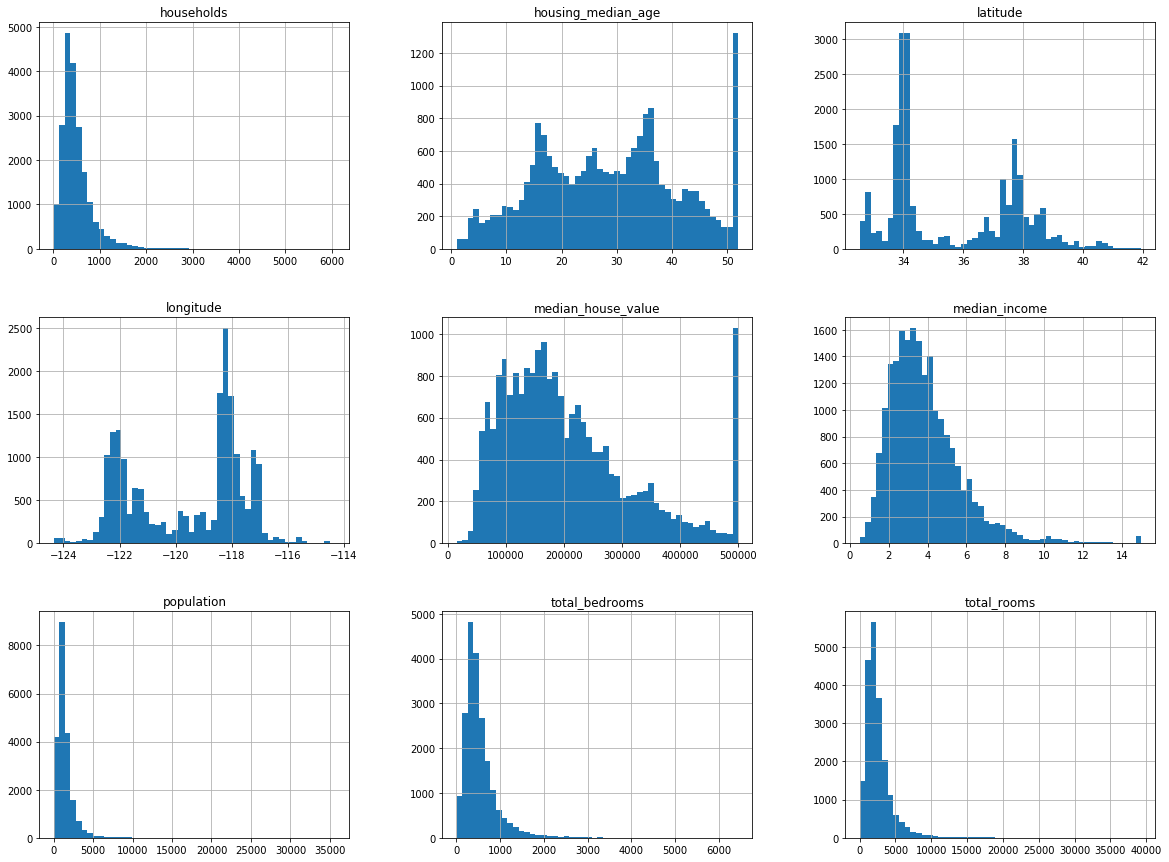

In [7]:
# histogram of each numerical column
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# splitting data into train and test sets 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [9]:
# categorize median income from continuous numerical attribute. this is for stratification later
data['income_cat'] = np.ceil(data['median_income'] / 1.5)
data['income_cat'].where(data['income_cat'] < 5, 5.0,inplace = True)

In [10]:
data['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

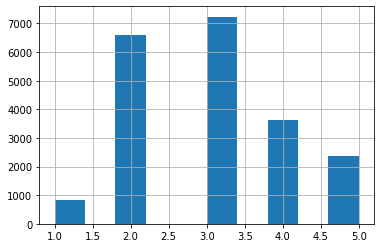

In [11]:
data['income_cat'].hist()

In [12]:
# stratified sampling data split to reflect the population better. train_test_split is purely random
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit (n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index  in sss.split(data,data['income_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [13]:
# stratified sets will be based on data['income_cat'] as per below percentage
data['income_cat'].value_counts()/len(data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
# drop the income_cat column as we have stratified the data
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

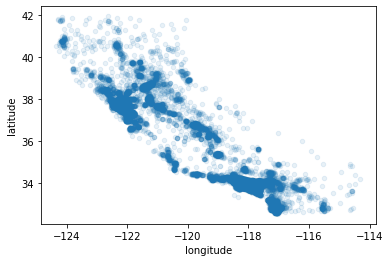

In [15]:
data_ = strat_train_set.copy()

# map the longitude and latitude data 
data_.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.1)

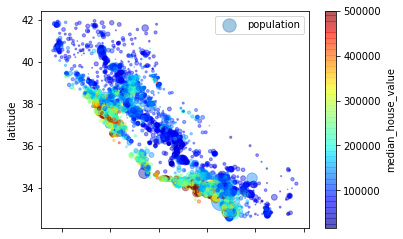

In [16]:
data_.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4 , s=data_['population']/100, label = 'population', c='median_house_value', cmap = plt.get_cmap('jet'), colorbar=True)

In [17]:
# correlation matrix
corr_matrix = data_.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14BD2710>,
      dtype=object)

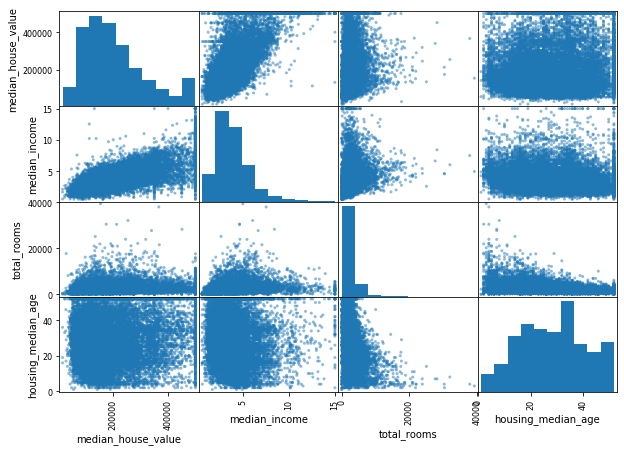

In [18]:
from pandas.plotting import scatter_matrix

features = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(data_[features], figsize=(10,7))

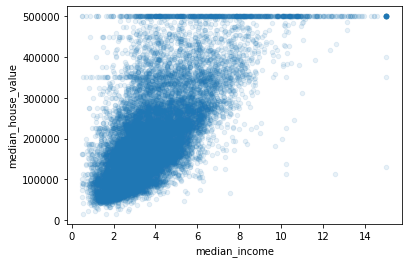

In [19]:
# median_house_value vs median_income has the highest correlation with upward trend
data_.plot(kind='scatter', x='median_income' , y='median_house_value', alpha=0.1)

In [20]:
# testing attribute combinations
data_['rooms_per_household'] = data_['total_rooms']/data_['households']
data_['bedrooms_per_room'] = data_['total_bedrooms']/data_['total_rooms']
data_['population_per_household'] = data_['population']/data_['households']
corr_matrix = data_.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [21]:
# separate feature columns and label column
data_features = strat_train_set.drop('median_house_value', axis=1)
data_labels = strat_train_set['median_house_value'].copy()

### Data cleaning

In [22]:
# Data cleaning and taking care of missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

data_features_num = data_features.drop('ocean_proximity',axis=1)
imputer.fit(data_features_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [23]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [24]:
data_features_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [25]:
X = imputer.transform(data_features_num)
data_tr  = pd.DataFrame(X, columns = data_features_num.columns)
data_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [26]:
data_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [27]:
# categorize text data 
data_cat = data_['ocean_proximity']
data_cat_encoded, data_categories = data_cat.factorize()
data_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int32)

In [28]:
data_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [29]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto', sparse = False)
data_cat_1hot = encoder.fit_transform(data_cat_encoded.reshape(-1,1))
data_cat_1hot # similar like dummy columns

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [30]:
# Custom Transformers

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:, population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
data_extra_attribs = attr_adder.transform(data_.values)

In [31]:
# create pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline ([
    ('imputer', SimpleImputer(strategy='median')), # missing values
    ('attribs_adder', CombinedAttributesAdder()), # add attributes if any
    ('std_scaler', StandardScaler()), # feature scaling
])

data_num_tr = num_pipeline.fit_transform(data_features_num)
data_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [32]:
# creating custom transformer for dataframe selection

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [33]:
# two pipelines: numerical and categorical

num_attribs = list(data_features_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline ([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline ([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(categories='auto', sparse = False)),
])

In [34]:
# combine the pipelines into 1 pipeline 

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion (transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [35]:
data_prepared = full_pipeline.fit_transform(data_)
data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### Select and Train Model

In [36]:
# Test LinearReg

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data_prepared,data_labels)
data_predictions = lr.predict(data_prepared)

In [37]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(data_labels, data_predictions)
rmse = np.sqrt(mse)
rmse

68628.19819848922

In [38]:
# Test decision tree

from sklearn.tree import DecisionTreeRegressor

tr = DecisionTreeRegressor(random_state = 42)
tr.fit(data_prepared,data_labels)
data_predictions = tr.predict(data_prepared)
mse = mean_squared_error(data_labels, data_predictions)
rmse = np.sqrt(mse)
rmse # result shows overfitting

0.0

In [39]:
# cross validation to evaluate the model

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tr, data_prepared, data_labels, scoring = 'neg_mean_squared_error', cv=10)
scores

array([-4.92724492e+09, -4.46961291e+09, -5.24647900e+09, -5.00679914e+09,
       -5.05746872e+09, -5.71311365e+09, -4.93686969e+09, -4.93838343e+09,
       -5.68016653e+09, -5.07394900e+09])

In [40]:
tr_rmse = np.sqrt(-scores)
tr_rmse

array([70194.33680785, 66855.16363941, 72432.58244769, 70758.73896782,
       71115.88230639, 75585.14172901, 70262.86139133, 70273.6325285 ,
       75366.87952553, 71231.65726027])

In [41]:
def display_scores (scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard Deviation:',scores.std())
    
display_scores(tr_rmse)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard Deviation: 2439.4345041191004


In [42]:
# cross validation with LR
lr_scores = cross_val_score(lr, data_prepared, data_labels, scoring = 'neg_mean_squared_error', cv=10)
lr_rmse = np.sqrt(-lr_scores)
display_scores(lr_rmse)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.674001798345


somehow with cross validation tr performed poorer than lr. let's try with random forest

In [43]:
# Testing with Random Forest

from sklearn.ensemble import RandomForestRegressor

fr = RandomForestRegressor(n_estimators = 10, random_state = 42)
fr.fit(data_prepared, data_labels)
fr_predictions = fr.predict(data_prepared)
fr_mse = mean_squared_error(data_labels, fr_predictions)
fr_rmse = np.sqrt(fr_mse)
fr_rmse

21933.31414779769

In [44]:
fr_scores = cross_val_score(fr, data_prepared, data_labels, scoring = 'neg_mean_squared_error', cv=10)
fr_rmse = np.sqrt(-fr_scores)
display_scores(fr_rmse)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard Deviation: 2298.353351147122


random forest gave better performance. let's tune our model.

### Hyperparameter tuning

In [45]:
# setting up parameters

from sklearn.model_selection import GridSearchCV

params = [
    {'n_estimators': [3,10,30],
    'max_features': [2,4,6,8]},
    {'bootstrap': [False],
    'n_estimators': [3,10],
    'max_features': [2,3,4]}
]

grid_search = GridSearchCV(fr, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(data_prepared,data_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
      

In [46]:
# best of the best

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_estimator)
print(best_params)
print(np.sqrt(-best_score))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
{'max_features': 8, 'n_estimators': 30}
49682.25345942335


In [52]:
# showing evaluation scores

cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([0.06411014, 0.1978385 , 0.60690174, 0.09641724, 0.3127914 ,
        0.95096445, 0.12543559, 0.42514801, 1.28318748, 0.15994158,
        0.53812742, 1.63959785, 0.10023108, 0.32483764, 0.12485843,
        0.41433344, 0.15285201, 0.50594316]),
 'std_fit_time': array([0.00605954, 0.00429912, 0.00765969, 0.00377503, 0.00388722,
        0.01729985, 0.00460143, 0.00482122, 0.00231552, 0.0032473 ,
        0.00981782, 0.01456865, 0.00410601, 0.0038161 , 0.00405265,
        0.00554923, 0.00061108, 0.00323274]),
 'mean_score_time': array([0.0004117 , 0.0085999 , 0.02116933, 0.00042334, 0.0097075 ,
        0.02187343, 0.00448012, 0.00977087, 0.0204072 , 0.00247383,
        0.00609531, 0.01918669, 0.00203919, 0.00816965, 0.0032515 ,
        0.00816135, 0.00364141, 0.00654087]),
 'std_score_time': array([8.23402405e-04, 3.23849994e-03, 1.60293701e-03, 8.46672058e-04,
        8.26585866e-04, 3.14618609e-03, 3.91766790e-03, 8.37983208e-04,
        9.49781340e-05, 4.00184404e-

In [54]:
# organizing the evaluation scores
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [50]:
# finding relative importance of each attribute
feature_importances = best_estimator.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [51]:
# organizing importance of each attribute
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder = cat_pipeline.named_steps['cat_encoder']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.002856474637320158, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

### Evaluate the model on the test set

In [56]:
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final = best_estimator.predict(X_test_prepared)

final_mse = mean_squared_error (y_test,final)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927